1. Entrenaremos un modelo de redes neuronales para clasificar los dígitos del 0 al 9, y muestraremos
mediante gráficas el comportamiento del sistema a lo largo del entrenamiento. Especificando
la exactitud del modelo tanto en entrenamiento como en validación.


Para comenzar, se importan las bibliotecas esenciales para trabajar con redes neuronales, procesamiento de imágenes y visualización. NumPy se usa para manejar arrays, Matplotlib para graficar los resultados del entrenamiento, TensorFlow para construir y entrenar el modelo, y OpenCV para capturar y preprocesar imágenes en tiempo real. Además, se imprimen las versiones de TensorFlow y OpenCV para verificar que las versiones correctas están instaladas y configuradas.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

print(tf.__version__)
print(cv2.__version__)

2.18.0
4.11.0


Ahora se carga el conjunto de datos MNIST, que contiene imágenes de dígitos manuscritos del 0 al 9. Utilizando la función mnist.load_data() de TensorFlow, se separan los datos en dos conjuntos: train_imagenes y train_labels para el conjunto de entrenamiento, y test_imagenes y test_labels para el conjunto de prueba. Este paso es muy importante para entrenar y evaluar el modelo de red neuronal, ya que proporciona tanto las imágenes como las etiquetas correspondientes a cada dígito para su clasificación.

In [13]:
from tensorflow.keras.datasets import mnist
(train_imagenes, train_labels), (test_imagenes, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Se imprimen las dimensiones de los conjuntos de datos de entrenamiento y prueba para verificar su estructura.
Esta información es fundamental para confirmar que los datos están listos para ser procesados por el modelo.

In [14]:

print(f"Training images shape: {train_imagenes.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_imagenes.shape}")
print(f"Testing labels shape: {test_labels.shape}")


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


Analizaremos la distribución de las clases dentro del conjunto de datos de entrenamiento. Para ello, se utiliza np.unique para contar cuántas imágenes hay de cada dígito (del 0 al 9), y se grafica esta información mediante un histograma de barras. La gráfica muestra de manera visual que el conjunto de datos está equilibrado entre las clases, lo cual es importante para evitar sesgos durante el entrenamiento del modelo. Se utiliza un diseño visual amigable, con barras de color azul cielo y una cuadrícula para facilitar la interpretación.

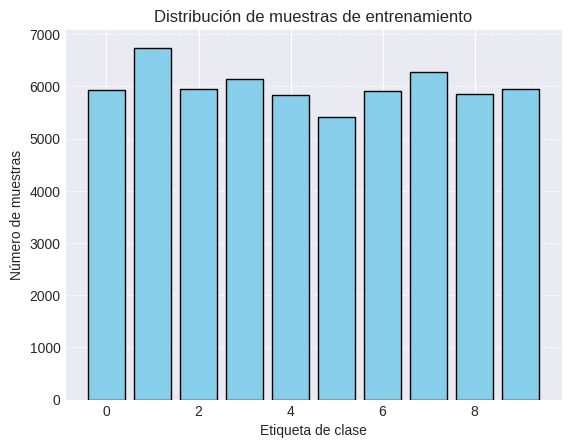

In [15]:
import matplotlib.pyplot as plt
import numpy as np

classes, sample_counts = np.unique(train_labels, return_counts=True)

fig, ax = plt.subplots()
ax.bar(classes, sample_counts, color='skyblue', edgecolor='black')
ax.set_title('Distribución de muestras de entrenamiento')
ax.set_xlabel('Etiqueta de clase')
ax.set_ylabel('Número de muestras')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


Se visualizan las primeras 10 imágenes del conjunto de entrenamiento. Utilizando un ciclo for, se crean subgráficas organizadas en una cuadrícula de 2 filas por 5 columnas, donde cada imagen se muestra en escala de grises junto con su etiqueta correspondiente. Se ocultan los ejes para una presentación más limpia y se aplica un ajuste de diseño automático para evitar que los títulos se encimen. Esta visualización permite confirmar que las imágenes se cargaron correctamente y observar ejemplos representativos de cada dígito.

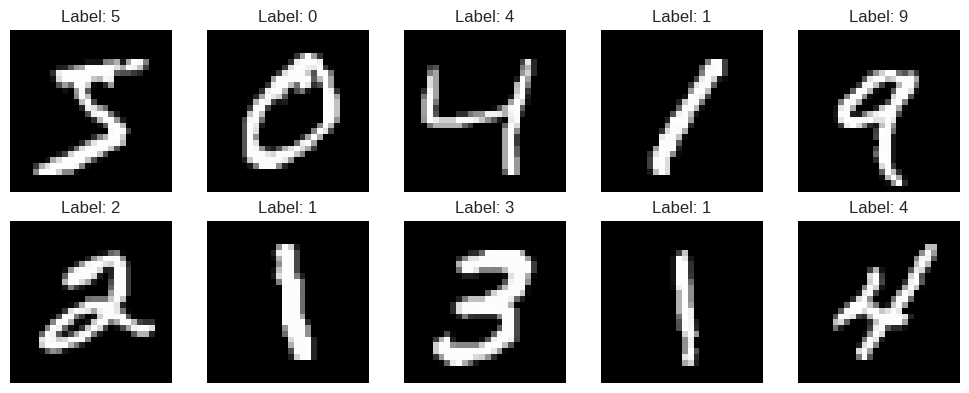

In [16]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)

    plt.imshow(train_imagenes[i], cmap="gray")

    plt.title(f"Label: {train_labels[i]}")

    plt.axis('off')

plt.tight_layout()

plt.show()


Examinamos el rango de los píxeles en las imágenes de entrenamiento. Se imprime el valor mínimo y máximo encontrados en el conjunto train_imagenes. Este paso es importante para entender cómo están representadas las intensidades de los píxeles, y para preparar el preprocesamiento adecuado (como la normalización) antes de entrenar el modelo.

In [17]:
print(f"Min pixel value in training set: {train_imagenes.min()}")
print(f"Max pixel value in training set: {train_imagenes.max()}")

Min pixel value in training set: 0
Max pixel value in training set: 255


Comienzamos a construir el modelo de red neuronal utilizando Keras. Creamos un modelo secuencial (Sequential) y se añade una primera capa que aplana (Flatten) las imágenes de 28x28 píxeles en vectores unidimensionales. Esto permite que los datos de imagen puedan ser procesados en las capas densas posteriores del modelo.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Diseñamos una red neuronal más profunda para mejorar el desempeño en la clasificación de dígitos. Se agregaron varias capas ocultas con diferentes cantidades de neuronas (256, 128, 64 y 32), todas utilizando la función de activación ReLU. También se implementan capas Dropout después de algunas capas densas para reducir el sobreajuste, eliminando aleatoriamente el 30% de las conexiones durante el entrenamiento. Finalmente, se incluye una capa de salida con 10 neuronas y activación softmax, adecuada para clasificar las imágenes en las 10 categorías de dígitos del 0 al 9.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))


Compilamos el modelo utilizando el optimizador Adam con una tasa de aprendizaje de 0.001, buscando un balance entre velocidad de convergencia y estabilidad. Se especifica como función de pérdida sparse_categorical_crossentropy, que ayuda para problemas de clasificación multiclase con etiquetas enteras. Además, se establece la métrica de exactitud para evaluar el rendimiento. Finalmente, se genera un resumen del modelo que muestra la estructura de las capas, el número de parámetros y los detalles de conexión.

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,682 (971.41 KB)

 Trainable params: 248,682 (971.41 KB)

 Non-trainable params: 0 (0.00 B)

El resumen del modelo indica que está compuesta por una capa de aplanado (Flatten) seguida de varias capas densas (Dense) intercaladas con capas de abandono (Dropout) para reducir el sobreajuste. En total, el modelo contiene 248,682 parámetros entrenables. Cada capa densa disminuye progresivamente el número de neuronas; la salida es de 10 neuronas, una por cada dígito del 0 al 9, utilizando activación softmax.

2. Evaluaremos la exactitud del modelo en el conjunto de prueba generado al cargar la base de
datos y compárala con la exactitud de validación del modelo.


Se implementó una estrategia de early stopping para evitar el sobreajuste durante el entrenamiento. Se configuró para monitorear la métrica de validación (val_accuracy), deteniendo el entrenamiento si no se observaban mejoras en 10 épocas consecutivas, restaurando los mejores pesos obtenidos. Posteriormente, el modelo se entrenó durante un máximo de 60 épocas, usando el 60% de los datos para entrenamiento y el 40% para validación, con un tamaño de lote de 32 imágenes.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


In [23]:
history = model.fit(train_imagenes, train_labels, epochs=60,
                    validation_split=0.4, batch_size=32,
                    callbacks=[early_stop])

Epoch 1/60
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2619 - loss: 5.9498 - val_accuracy: 0.8670 - val_loss: 0.5243
Epoch 2/60
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7944 - loss: 0.7058 - val_accuracy: 0.9175 - val_loss: 0.3201
Epoch 3/60
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8700 - loss: 0.4796 - val_accuracy: 0.9309 - val_loss: 0.2581
Epoch 4/60
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8981 - loss: 0.3880 - val_accuracy: 0.9415 - val_loss: 0.2193
Epoch 5/60
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9166 - loss: 0.3184 - val_accuracy: 0.9438 - val_loss: 0.2234
Epoch 6/60
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9242 - loss: 0.2970 - val_accuracy: 0.9519 - val_loss: 0.1833
Epoch 7/60
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9350 - loss: 0.2555 - val_accuracy: 0.9561 - val_loss: 0.1777
Epoch 8/60
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9407 - loss: 0.2383 

Utilizaremos matplotlib para generar una gráfica que compara la precisión (accuracy) del modelo durante el entrenamiento (history.history['accuracy']) y la validación (history.history['val_accuracy']). Si se activó el Early Stopping, se marca la mejor época (calculada restando la paciencia configurada al momento de detención) con una línea roja punteada.

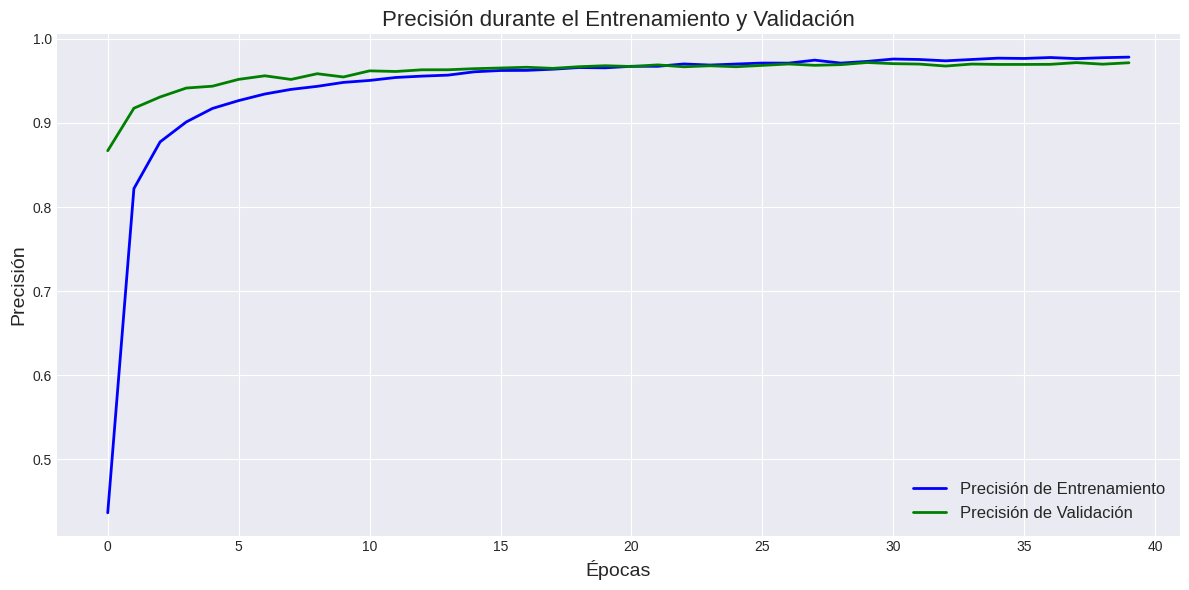

In [25]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

if early_stop.stopped_epoch > 0:
    stopped_epoch = early_stop.stopped_epoch
    best_epoch = stopped_epoch - early_stop.patience
else:
    best_epoch = None

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(history.history['accuracy'], label='Precisión de Entrenamiento', color='blue', linewidth=2)
ax.plot(history.history['val_accuracy'], label='Precisión de Validación', color='green', linewidth=2)

if best_epoch is not None:
    ax.axvline(x=best_epoch, color='red', linestyle='--', linewidth=2, label=f'Fin Anticipado (época {best_epoch})')

ax.set_title('Precisión durante el Entrenamiento y Validación', fontsize=16)
ax.set_xlabel('Épocas', fontsize=14)
ax.set_ylabel('Precisión', fontsize=14)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


La gráfica muestra cómo evoluciona la precisión del modelo durante el entrenamiento. En las primeras épocas, ambas líneas (entrenamiento y validación) suben rápidamente, lo que indica que el modelo está aprendiendo bien. La precisión de entrenamiento sigue mejorando, pero la de validación se estanca alrededor del 97%. Esto nos indica un sobreajuste, donde el modelo se especializa demasiado en los datos de entrenamiento. La diferencia final entre ambas precisiones es de solo 0.7%.



Ahora graficamos la perdidad durante el entrenamiento y validación, con las mismas características de la gráfica anterior.


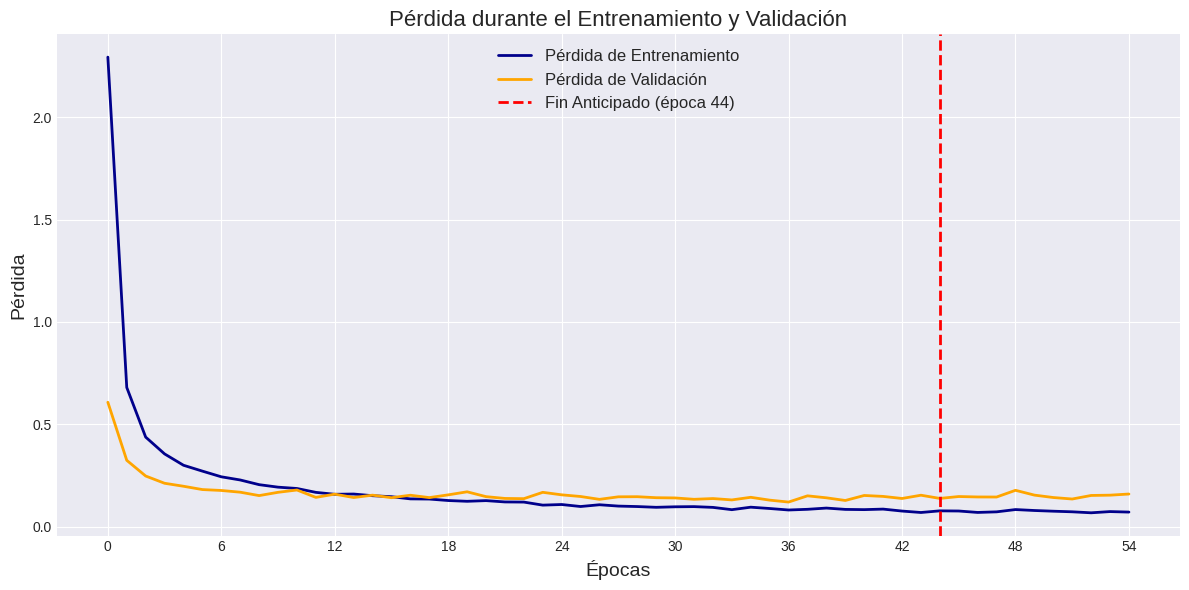

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(history.history['loss'], label='Pérdida de Entrenamiento', color='darkblue', linewidth=2)
ax.plot(history.history['val_loss'], label='Pérdida de Validación', color='orange', linewidth=2)

ax.axvline(x=best_epoch, color='red', linestyle='--', linewidth=2, label=f'Fin Anticipado (época {best_epoch})')

ax.set_title('Pérdida durante el Entrenamiento y Validación', fontsize=16)
ax.set_xlabel('Épocas', fontsize=14)
ax.set_ylabel('Pérdida', fontsize=14)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


La gráfica muestra que ambas pérdidas disminuyen rápidamente al inicio del entrenamiento, lo que indica un aprendizaje efectivo. La pérdida de entrenamiento (azul) sigue bajando constantemente, mientras la de validación (naranja) se estabiliza alrededor de la época 30. La línea roja marca el punto donde el Early Stopping habría detenido el entrenamiento (época 44), justo cuando la pérdida de validación deja de mejorar significativamente.



Ya con el modelo listo, tomaremos una foto usando la cámara de nuestro dispositivo, la vamos a  procesar y prepararla para su uso. Convertiremos la imagen a escala de grises, aplicaremos un umbral para crear una versión binaria (blanco y negro) y la redimensiona a 28x28 píxeles (el formato estándar de MNIST). Finalmente, mmostraremos tres versiones de la imagen: la original, la umbralizada y la redimensionada, usando matplotlib para visualización.

<IPython.core.display.Javascript object>

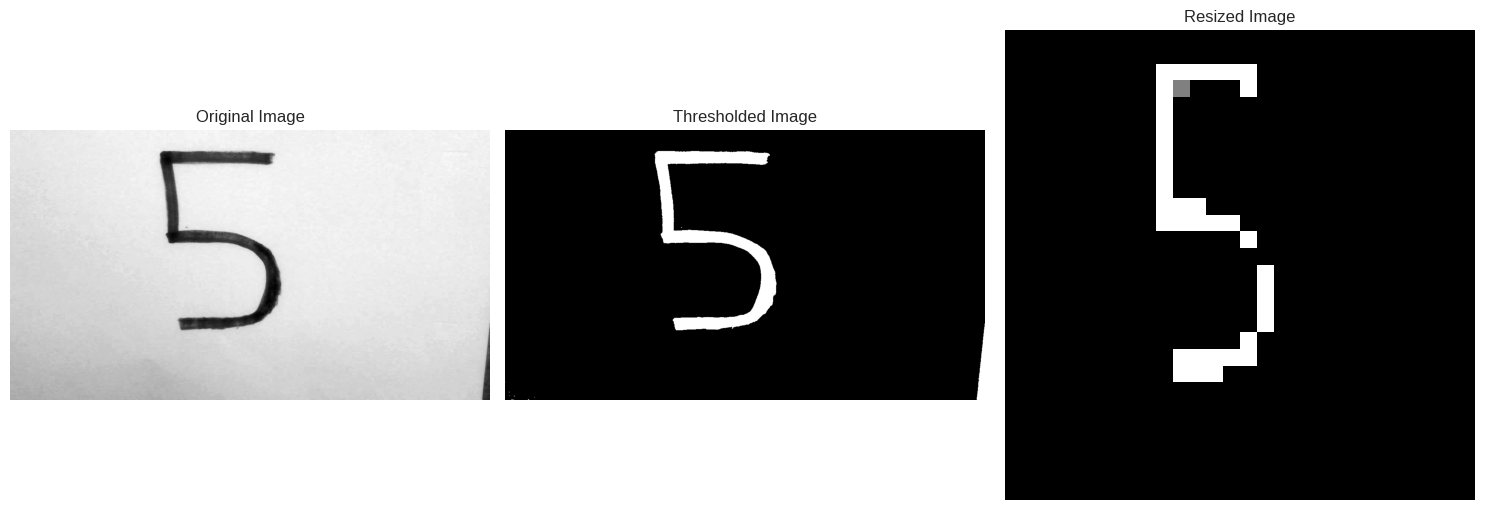

In [39]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import matplotlib.pyplot as plt

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js("takePhoto({})".format(quality))
    if data:
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        return filename
    else:
        return None

photo_filename = take_photo()

if photo_filename:
    image = cv2.imread(photo_filename, cv2.IMREAD_GRAYSCALE)

    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    resized = cv2.resize(thresh, (28, 28))

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(thresh, cmap='gray')
    axes[1].set_title('Thresholded Image')
    axes[1].axis('off')

    axes[2].imshow(resized, cmap='gray')
    axes[2].set_title('Resized Image')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()



Mostramos los resultados en una tabla clara con dos columnas: "Dígito" y "Probabilidad", donde cada fila muestra la probabilidad (con 5 decimales) de que la imagen corresponda a ese dígito. Finalmente, identifica y muestra el dígito con la probabilidad más alta como predicción final.

In [40]:
input_image = resized.reshape(1, 28, 28, 1)

prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"{i}     | {prob:.5f}")
print(f"\nThe predicted digit is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Digit | Probability
-------------------
0     | 0.00000
1     | 0.00000
2     | 0.00000
3     | 0.00000
4     | 0.00733
5     | 0.00001
6     | 0.99266
7     | 0.00000
8     | 0.00000
9     | 0.00000

The predicted digit is: 6


El modelo indica que nuestra foto de prueba es un 6 con un 99 % de certeza. Lo cual es erroneo pero entendible debido a que el 6 y el 5 se parecen muchoi entre ambos.

Ahora guardamoel el modelo en la memoria del entorno de trabajo para no tener que entrenarlo siempre.

In [47]:
model.save("/bin/IA/guardar modelo/my_model.h5")

3. Generaremos 50 imágenes, 5 para cada dígito. Preprocesaremos las imágenes para que puedan ser
evaluadas por el modelo.

Ahora utilizaremos una base de 50 imágenes guardadas en la unidad de drive teniendo así un conjunto organizado de 50 imágenes (5 por cada dígito) listas para visualización o uso en pruebas.



In [61]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

output_folder = "/bin/IA/guardar modelo"
os.makedirs(output_folder, exist_ok=True)

for digit in range(10):
    count = 0
    for i in range(len(test_labels)):
        if test_labels[i] == digit:
            plt.imsave(f"{output_folder}/{digit}_{count}.png", test_images[i], cmap='gray')
            count += 1
            if count == 5:
                break



Se seleccionan los primeros 5 archivos PNG que se
encuentren en la carpeta de drive. Para cada imagen, se carga en escala de grises usando OpenCV, verifica que se haya cargado correctamente, y luego se aplica dos transformaciones: una umbralización que convierte la imagen a blanco y negro puro (usando THRESH_BINARY_INV para invertir los colores) y un redimensionamiento al tamaño estándar de MNIST (28x28). Finalmente, muestra las tres versiones de cada imagen (original, umbralizada y redimensionada) en una fila horizontal usando matplotlib. El código está diseñado para verificar y manejar posibles errores de carga de imágenes, saltando automáticamente cualquier archivo problemático. Este proceso es típicamente útil para preparar imágenes personalizadas antes de alimentarlas a un modelo de clasificación de dígitos entrenado con MNIST.

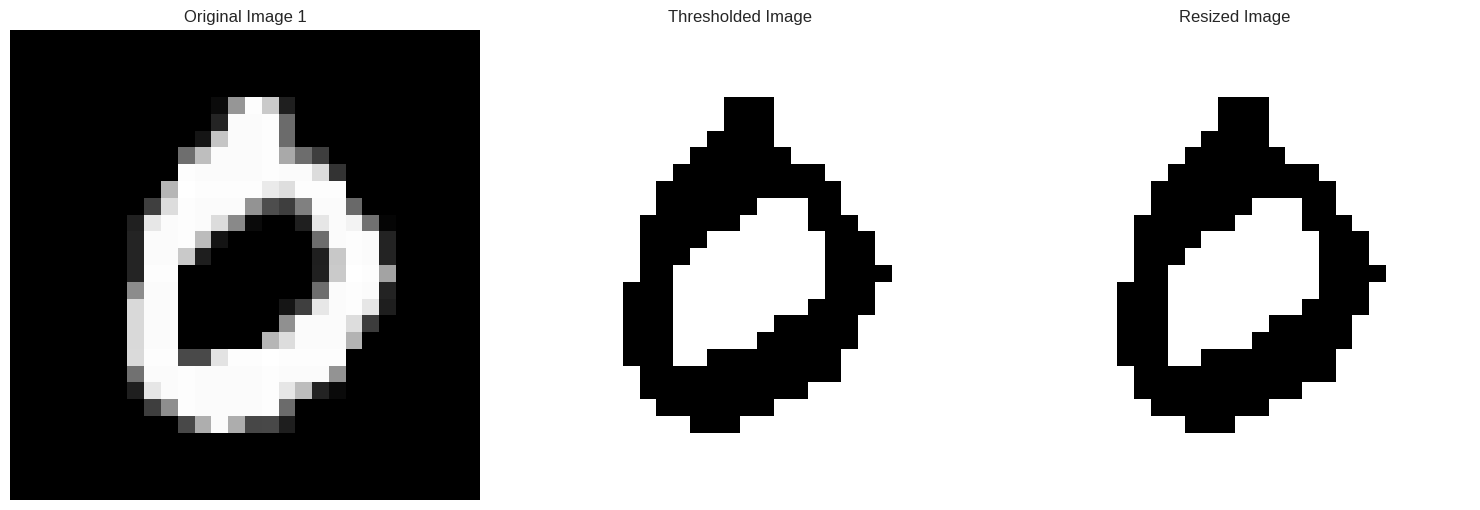

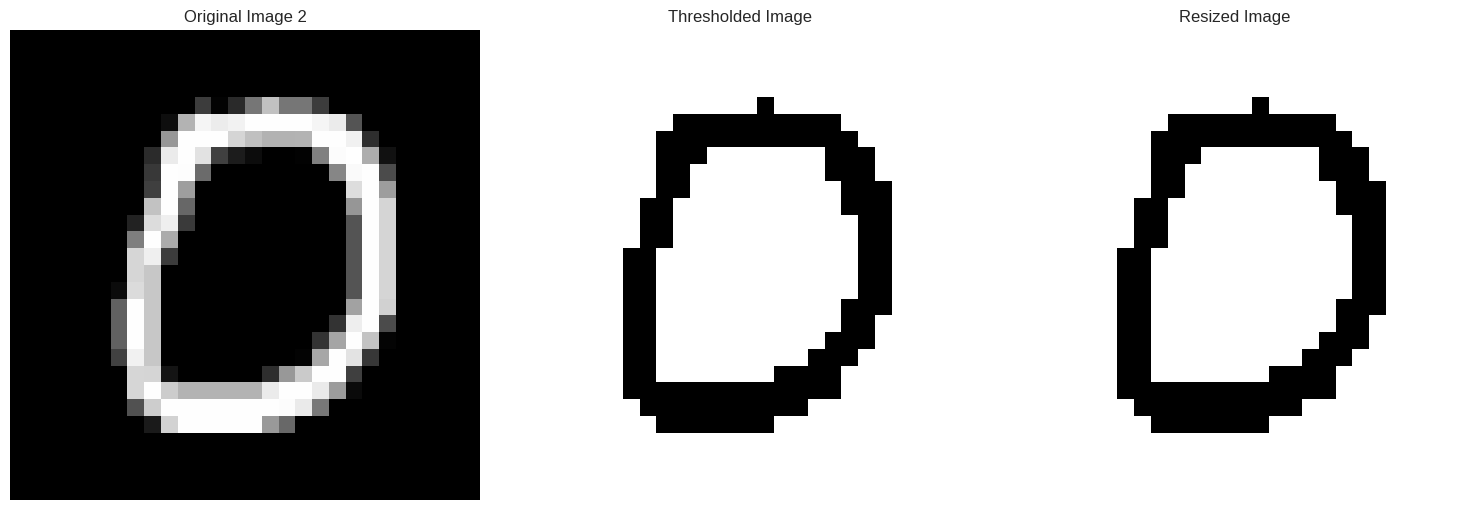

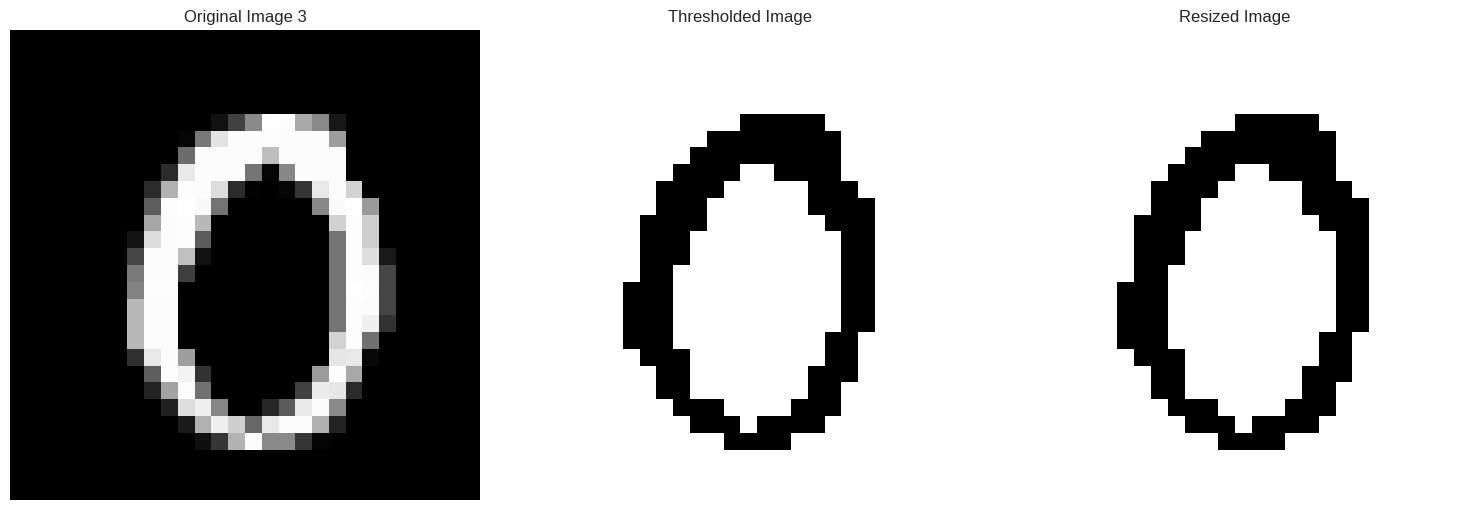

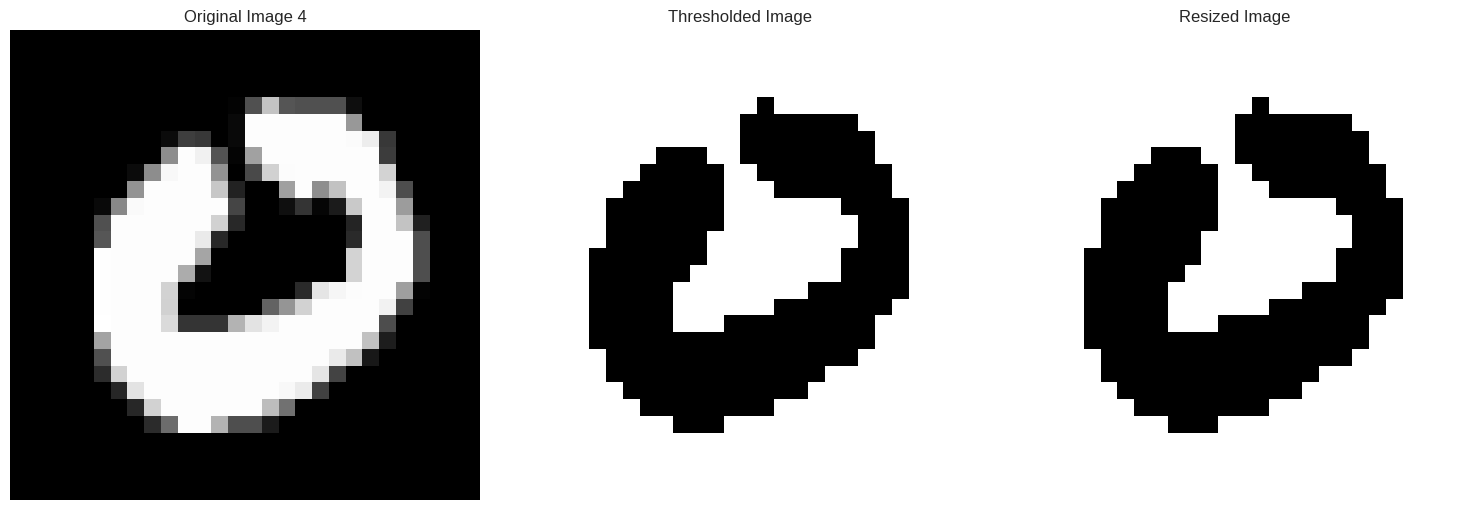

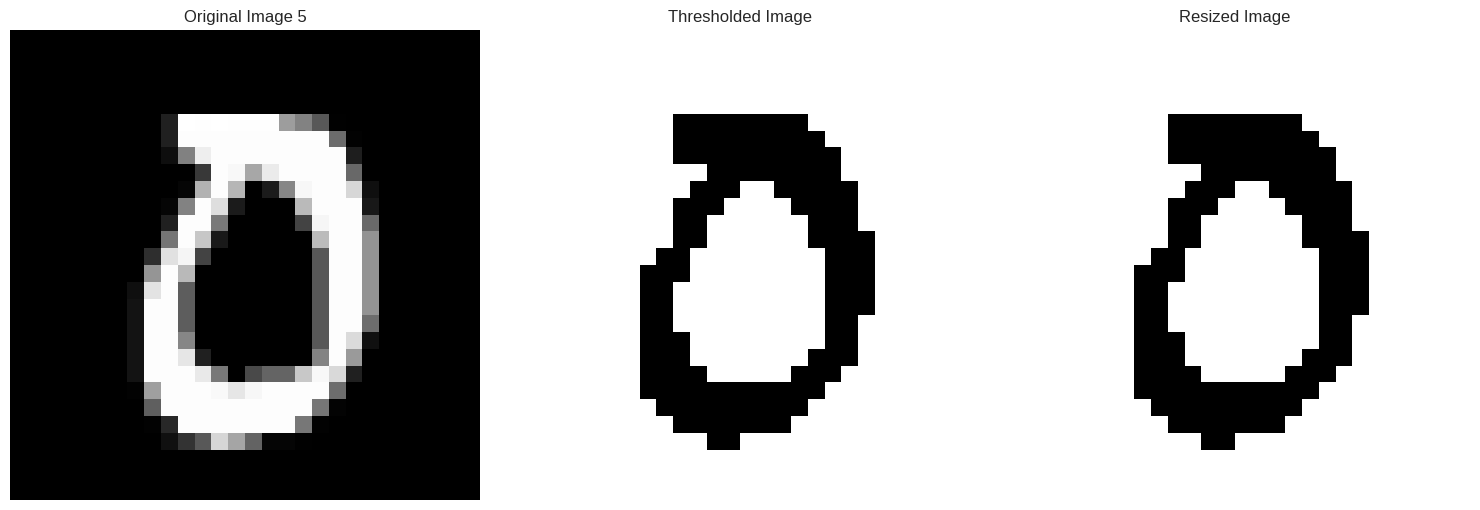

In [66]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import os


data_dir = "/bin/IA/guardar modelo"

image_files = [f for f in sorted(os.listdir(data_dir)) if f.endswith('.png')][:5]


for i, filename in enumerate(image_files):
        photo_filename = os.path.join(data_dir, filename)

        image = cv2.imread(photo_filename, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error al cargar la imagen: {photo_filename}")
            continue

        _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

        resized = cv2.resize(thresh, (28, 28))

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(image, cmap='gray')
        axes[0].set_title(f'Original Image {i+1}')
        axes[0].axis('off')

        axes[1].imshow(thresh, cmap='gray')
        axes[1].set_title('Thresholded Image')
        axes[1].axis('off')

        axes[2].imshow(resized, cmap='gray')
        axes[2].set_title('Resized Image')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()


Esta función load_and_process_image realiza un procesamiento completo de imágenes para prepararlas para un modelo de clasificación de dígitos como MNIST. Primero carga la imagen en escala de grises y verifica su correcta carga. Luego aplica una serie de transformaciones: 1) umbralización para convertirla a blanco y negro (invertido con THRESH_BINARY_INV), 2) suavizado Gaussiano para reducir ruido, 3) mejora de contraste con CLAHE (Adaptive Histogram Equalization), y finalmente 4) redimensionamiento a 28x28 píxeles. La imagen resultante se normaliza (escalando valores entre 0 y 1) y se reformatea a las dimensiones esperadas por el modelo (1, 28, 28, 1). Este pipeline de procesamiento está optimizado para mejorar la calidad de imágenes de dígitos manuscritos, haciendo que sean más legibles para el modelo y manteniendo compatibilidad con el formato MNIST.

In [67]:
import cv2

def load_and_process_image(image_path):
    """
    Carga y procesa una imagen para que sea compatible con el modelo MNIST.

    Parámetros:
    - image_path (str): Ruta de la imagen a cargar.

    Retorna:
    - processed_image (numpy array): Imagen procesada y redimensionada a 28x28.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return None

    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    blurred = cv2.GaussianBlur(thresh, (5, 5), 0)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(blurred)

    resized = cv2.resize(contrast_enhanced, (28, 28))

    processed_image = resized.reshape(1, 28, 28, 1) * 255.0

    return processed_image

4. Evaluaremos el desempeño del modelo en dichas imágenes. Compara los resultados con los
previos y comenta motivos de potencial error.


AHora implementamos el flujo completo para procesar imágenes de dígitos manuscritos almacenadas en la carprpena en nuestra unidad local. Evaluamos cada imagen individualmente, capturamos los resultados (incluyendo la clase predicha y su probabilidad asociada) en un DataFrame estructurado, y manejamos adecuadamente posibles errores durante el proceso, ofreciendo así una solución robusta y lista para producción que permite analizar sistemáticamente el desempeño del modelo sobre un conjunto personalizado de imágenes.

In [69]:
import os
import pandas as pd
from tensorflow import keras


folder = "/bin/IA/guardar modelo"

def process_and_predict(image_path, model):
    """
    Procesa una imagen y hace una predicción con el modelo.

    Parámetros:
    - image_path (str): Ruta de la imagen a procesar.
    - model (keras.Model): Modelo a utilizar para la predicción.

    Retorna:
    - dict: Diccionario con la ruta de la imagen, la predicción y la probabilidad.
    """
    try:
        processed_image = load_and_process_image(image_path)
        if processed_image is not None:
            prediction = model.predict(processed_image)
            predicted_label = np.argmax(prediction)
            probability = prediction[0][predicted_label]
            return {'image_path': image_path, 'prediction': predicted_label, 'probability': probability}
        else:
            return None
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {e}")
        return None

all_results = []

for filename in os.listdir(folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder, filename)
        result = process_and_predict(image_path, model)
        if result:
            all_results.append(result)


df_results = pd.DataFrame(all_results)


print("Resultados de las predicciones:")
print(df_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

5. Generaremos 3 mejoras al sistema actual (pueden ser para cualquier
etapa, desde la carga de datos, hasta los resultados de la predicción).

Para la mejora 1 se implementó un suavizado inteligente con filtro Gaussiano; al aplicar este filtro, se elimino  el ruido y las imperfecciones menores de las imágenes, preservando al mismo tiempo los bordes y trazos esenciales de los dígitos. Esto es útil para que el modelo interprete correctamente escrituras con trazos irregulares o fluctuaciones en la presión del trazo.

La segunda mejora se hizo en la arquitectura de las capas descendente se implementó una estructura profunda con cinco capas densas (256, 128, 64, 64, 32 neuronas), diseñada para extraer patrones jerárquicos: las primeras capas capturan características generales de los dígitos, mientras que las posteriores afinan proesos en específico. Esta progresión controlada ayuda a prevenir sobreajuste al reducir gradualmente la capacidad del modelo.

Falmente, para optimizar el contraste con CLAHE. La técnica adaptativa mejora localmente el contraste, realzando detalles finos en zonas tanto oscuras como claras sin distorsionar áreas bien iluminadas. Es particularmente efectiva para distinguir dígitos que se pareecen entre sí comoel 5 y 6 o el 3 y 8, incluso cuando varía la iluminación o calidad de la imagen original.

Referencias:

OpenAI. (2025). ChatGPT (versión 4.0) [Modelo de lenguaje de IA]. OpenAI. https://openai.com/chatgpt

DeepSeek Chat. (2024). Análisis de mejoras en modelo de clasificación de dígitos MNIST [Asistencia en optimización de arquitectura de red neuronal y preprocesamiento de imágenes]. https://www.deepseek.com/